# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 11</span>

Quest'esercitazione riguarda l'utizzo del machine learning come metodo di regressione su dati con un rumore gaussiano attraverso una rete neurale (NN).

### NN per predirre un processo probabilistico

Se i dati di processo stocastico sono generati estraendo campioni dall'equazione

$$
    y_i= f(x_i) + \eta_i,
$$

dove $f(x_i)$ è la funzione che si vuole fittare (quella _vera_) e $\eta_i$ è una variabile di rumore gaussiano non correlato tale che

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

Per effettuare previsioni, si può utilizzare una rete neurale: in dipendenza dai suoi parametri, pesi e bias, essa avrà una certa classe di modelli che potrà utilizzare per il fit.

Per apprenderne i parametri, la NN deve essere addestrata su un set di dati di _training_ e, successivamente può essere tetstata su un dataset diverso, mai visto dalla rete, il set di dati di _validation_.

Per misurare la capacità di previsione della NN, si possono confrontare le previsioni, ${y_j^\mathrm{pred}}$, con i valori veri ${y_j}$. Una misura comunemente utilizzata per questo è la somma dell'errore quadratico medio (MSE) sul set di test:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

## <span style="color:blue"> Esercizio 11.1 </span>

Si vuole allenare una rete a compiere un fit lineare:
$$
f(x)=2x+1
$$

La funzione vera è definita dei due parametri:

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Ora è possibile generare i dati di traing (che utilizzeremo per allenare la NN) e quelli di validation (che utilizzeremo per testarla), introducendo del rumore gaussiano.

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

I dati di validation sono plottati sotto e con essi la funzione target.

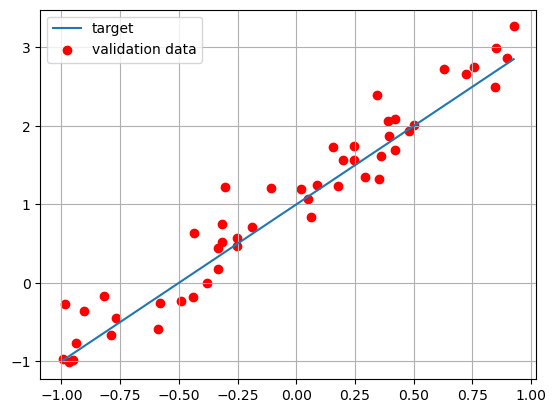

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In generale, un neurone non è altro che un operatore che riceve $n$ input, per esempio {$x_1, x_2, ..., x_n$}, li moltiplica con dei pesi $w_i$, li somma tra loro e vi aggiunge una costante $b$ (detta _bias_). Infine restituisce il valore che assume una certa funzione (detta _funzione di attivazione_, $af$) nel punto calcolato.  
Le $af$ possibili sono diverse, per esempio la sigmoide, la ReLu, la Theta ecc$\dots$ e vengono scelte a seconda degli scopi della rete:  l'azione totale del neurone è dunque:
$$
N_{w_i,b}(x_1, x_2, ..., x_n)=af(z)
\hspace{0.5 cm}
\hbox{con }
z=b+\sum_{i=0}^n w_i x_i
$$

Dunque è chiaro che per fittare una retta $f(x)=ax+b$ basta un solo neurone perché esso rappresenta una relazione lineare tra l'input e l'output: infatti il peso realizzerà il coefficiente angolare, mentre il bias l'intercetta.  
Per completare il modello inoltre, è necessario scegliere l'ottimizzatore e la funzione costo.

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

#creazione di un layer denso con un input monodimensionale (le ascisse)
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2023-07-13 00:50:04.244754: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Ora inizia la fase di allenamento, in cui vengono dati in pasto alla rete i set di ascisse e ordinate di training dai quali l'ottimizzatore troverà i migliori pesi e bias che minimizzino il MSE.

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 17ms/step - loss: 3.5294 - mse: 3.5294 - val_loss: 2.8319 - val_mse: 2.8319
Epoch 2/30
16/16 [==============================] - 0s 7ms/step - loss: 2.6717 - mse: 2.6717 - val_loss: 2.1702 - val_mse: 2.1702
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 2.0648 - mse: 2.0648 - val_loss: 1.6930 - val_mse: 1.6930
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 1.6225 - mse: 1.6225 - val_loss: 1.3431 - val_mse: 1.3431
Epoch 5/30
16/16 [==============================] - 0s 6ms/step - loss: 1.2949 - mse: 1.2949 - val_loss: 1.0781 - val_mse: 1.0781
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: 1.0445 - mse: 1.0445 - val_loss: 0.8744 - val_mse: 0.8744
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 0.8507 - mse: 0.8507 - val_loss: 0.7147 - val_mse: 0.7147
Epoch 8/30
16/16 [==============================] - 0s 6ms/step - loss: 0.6975 - mse: 0.6

Ora è possibile estrarre i pesi calcolati e valutare il modello sia con i dati di validation che con quelli della funzione target (solo se è nota, naturalmente).

In [7]:
# return weights and biases
model.get_weights()

[array([[1.9191667]], dtype=float32), array([0.965743], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.1022 - mse: 0.1022

Test loss: 0.10218803584575653
Test accuracy: 0.10218803584575653


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030    

Test loss: 0.002967932727187872
Test accuracy: 0.002967932727187872


Di seguito, sono stati graficati gli andamenti della _loss function_ dei dati di train e test in funzione dell'epoca.

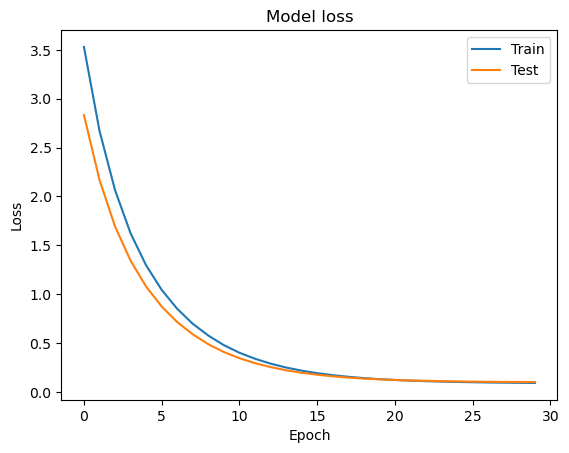

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Possiamo ora fare delle previsioni col nostro modello, ovvero possiamo valutare la funzione fittata in $x$ mai viste dalla rete e perfino non appartenenti all'intervallo di di training.  
È importante però notare che il caso di un andamento lineare è particolarmente favorevole per questo tipo di operazione, in quanto privo di cambi di derivata. 

7/7 [==============================] - 0s 2ms/step


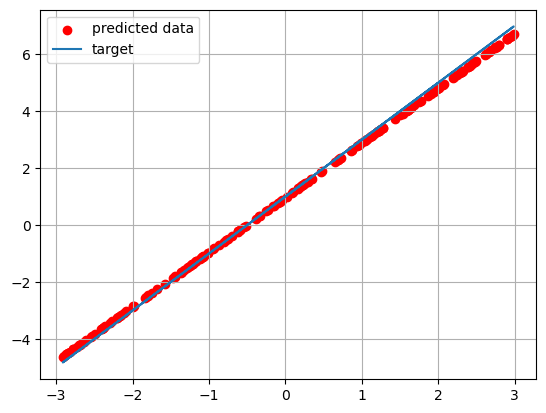

In [11]:
x_predicted = np.random.uniform(-3, 3, 200)
y_predicted = model.predict(x_predicted)
y_target = m * x_predicted + b 

plt.scatter(x_predicted, y_predicted,color='r', label = 'predicted data')
plt.plot(x_predicted, y_target, label = 'target')
plt.grid(True)
plt.legend()
plt.show()

### Variazioni sul tema

Si è quindi provato a modificare la rete per capire come e quanto il neurone è sensibile alle variazioni degli input che riceve.

- **Numero di epoche** e **di dati di training**: non sorprendentemente, aumentare i cicli di ottimizzazione e il numero di dati con cui viene fatta allenare la rete porta ad ottere un fit più preciso. Tuttavia la retta è una funzione estremamente semplice e di conseguenza anche un numero di epoche ridotto è risultato in un modello performante.

- $\sigma$ **del rumore Gaussiano**: aumentando la dispersione del rumore, la precisione del fit si riduce. L'effetto è però facilmente compensabile aumentando il numero di dati di training.

## <span style="color:blue"> Esercizio 11.2 </span>

Si vuole ora provare a creare una rete che fitti una funzione più complessa, come 
$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

Definiamo quindi i parametri da predirre con la NN.

In [12]:
# target parameters of f(x) = a*x^3 + b*x^2 + c*x + d
a = 3
b = -2
c = -3
d = 4

Ora, vengono generati i dati di train e validation che deviano da $f(x)$ per un noise gaussiano. Gli ultimi vengono quindi graficati insieme alla funzione target.

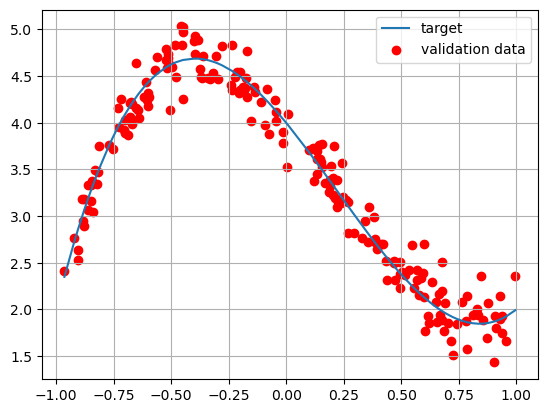

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 3000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = a * (x_valid**3) + b * (x_valid**2) + c * x_valid + d # ideal (target) linear function

sigma = 0.2 # noise standard deviation
y_train = np.random.normal(a * (x_train**3) + b * (x_train**2) + c * x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a * (x_valid**3) + b * (x_valid**2) + c * x_valid + d, sigma)

# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Chiaramente ora la rete non potrà più essere costituita da un solo neurone, ma dovrà essere più complessa e aggiungere più layers.

In [14]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(6, input_shape=(1,), activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6)                 12        
                                                                 
 dense_2 (Dense)             (None, 5)                 35        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
94/94 [==============================] - 1s 6ms/step - loss: 1.3717 - mse: 1.3717 - val_loss: 0.2641 - val_mse: 0.2641
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 0.3533 - mse: 0.3533 - val_loss: 0.2416 - val_mse: 0.2416
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 0.3290 - mse: 0.3290 - val_loss: 0.2194 - val_mse: 0.2194
Epoch 4/50
94/94 [==============================] - 0s 3ms/step - loss: 0.3002 - mse: 0.3002 - val_loss: 0.1984 - val_mse: 0.1984
Epoch 5/50
94/94 [==============================] - 0s 3ms/step - loss: 0.2645 - mse: 0.2645 - val_loss: 0.1703 - val_mse: 0.1703
Epoch 6/50
94/94 [==============================] - 0s 3ms/step - loss: 0.2242 - mse: 0.2242 - val_loss: 0.1469 - val_mse: 0.1469
Epoch 7/50
94/94 [==============================] - 0s 3ms/step - loss: 0.1847 - mse: 0.1847 - val_loss: 0.1165 - val_mse: 0.1165
Epoch 8/50
94/94 [==============================] - 0s 3ms/step - loss: 0.1513 - mse: 0.15

In [16]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.0413 - mse: 0.0413

Test loss: 0.04129156470298767
Test accuracy: 0.04129156470298767
7/7 [==============================] - 0s 4ms/step - loss: 0.0056 - mse: 0.0056

Test loss: 0.005587462801486254
Test accuracy: 0.005587462801486254


Una volta terminato di allenare la rete, possiamo tracciare l'andamento della loss e provare a prevedere l'andamento della funzione per nuovi valori di ascisse.

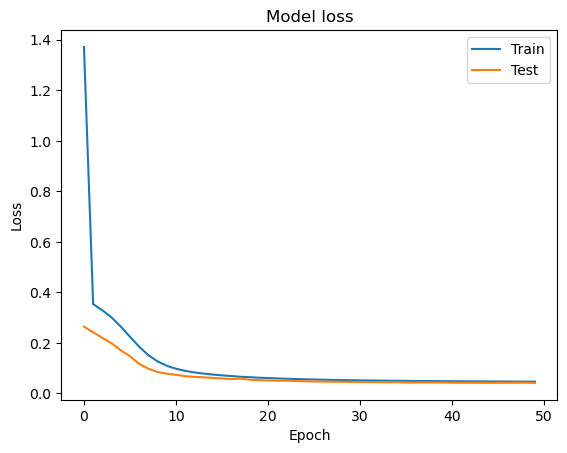

In [17]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


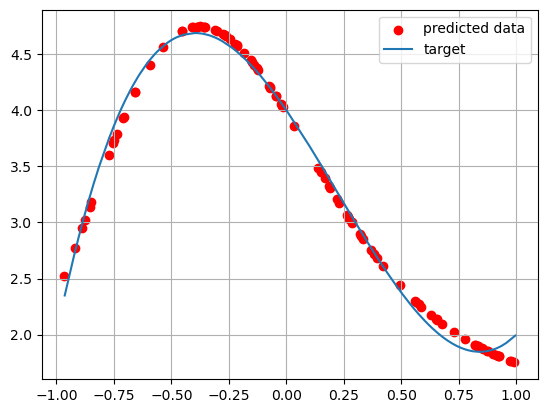

In [18]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r', label = 'predicted data')
plt.plot(x_valid, y_target, label = 'target')
plt.grid(True)
plt.legend()
plt.show()

Provando ora ad aumentare il dominio della funzione, si noterà che la rete perde velocemente l'abilità predittiva che ha nell'intervallo di ascisse di training e e il fit tenderà ad azzerarsi.

5/5 [==============================] - 0s 2ms/step


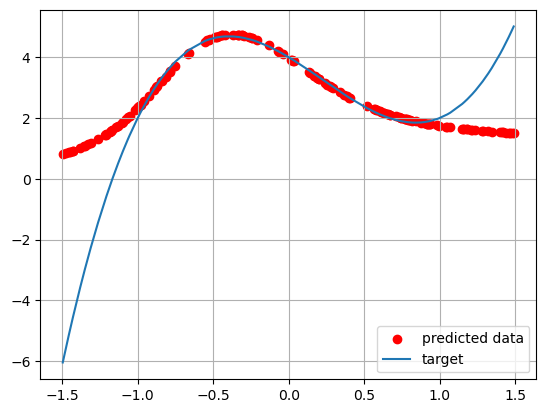

In [19]:
x = np.random.uniform(-1.5, 1.5, 150)
x.sort()

y_predicted = model.predict(x)
y_target = a * (x**3) + b * (x**2) + c * x + d

plt.scatter(x, y_predicted,color='r', label = 'predicted data')
plt.plot(x, y_target, label = 'target')
plt.grid(True)
plt.legend()
plt.show()

### Variazioni sul tema

Anche in questo caso sono state provate varie combinazioni di parametri per la costruzione della rete e del suo allenamento.  
Oltre alle osservazioni già fatte sulla dipendenza dal numero di dati e di epoche, sono state ottenute le seguenti evidenze empiriche:
- la $\sigma$ del **rumore** Gaussiano sembra non influire più di tanto, probabilmente perché il marcato e ampio picco che disegna la curva risulta ben visibile ache se i dati si sparpagliano molto

- aumentare il **numero di layer** e di **neuroni** può portare ad un overfitting, ovvero la rete tende a reputare vere deviazioni dovute al rumore: per esempio, è corretto che con una $\sigma=0.2$ non venga fittato il minimo per $x\in[0.5;0.75]$ in quanto completamente coperto. Lo _sweet spot_ sembrerebbe essere due layer prima di quello di output, con al più una decina di neuroni l'uno.

- la **funzione di attivazione** migliore è risultata essere $\tanh$, seguita dalla ReLu (che però, a parità di risultati, sembra richiedere più neuroni)

- per quanto riguarda l'**ottimizzatore**, il SGD ha dato risultati più precisi di Adagrad e Adam

## <span style="color:blue"> Esercizio 11.3 </span>

Infine, dalle funzioni polinomiali in 1D si è passato alla trigonometrica in 2D
$$
f(x,y) = \sin(x^2+y^2)
$$
per $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$

Vengono quindi generati i dati di train e validation che deviano da $f(x,y)$ per un noise gaussiano. Gli ultimi vengono quindi graficati insieme alla funzione target.

In [20]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-3./2, 3./2, 5000)
y_train = np.random.uniform(-3./2, 3./2, 5000)

x_valid = np.random.uniform(-3./2, 3./2, 500)
y_valid = np.random.uniform(-3./2, 3./2, 500)


sigma = 0.1 # noise standard deviation

z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

<IPython.core.display.Javascript object>


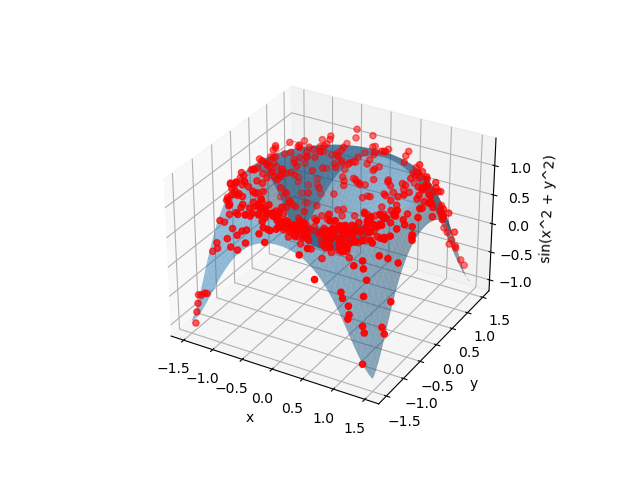

In [21]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crea una figura e un assi tridimensionali
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crea i valori di x e y nell'intervallo desiderato
x = np.linspace(-3./2, 3./2, 100)
y = np.linspace(-3./2, 3./2, 100)

# Crea una griglia di coordinate (x, y)
X, Y = np.meshgrid(x, y)

# Calcola i valori di z (funzione f(x, y))
Z = np.sin(X**2 + Y**2)

# Disegna la superficie
ax.plot_surface(X, Y, Z, alpha = 0.5, label='target')

# Aggiungi lo scatterplot
ax.scatter(x_valid, y_valid, z_valid, c='red', marker='o', label='validation data')

# Aggiungi etichette agli assi
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('sin(x^2 + y^2)')

# Mostra il grafico
plt.show()

Si è quindi creata e allenata la rete densa, graficando poi gli andamenti della loss sui dati di training e di test.

In [22]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
#model.add(Dense(70, input_shape=(2,), activation='relu'))
model.add(Dense(150, input_shape=(2,), activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [23]:
# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 150)               450       
                                                                 
 dense_5 (Dense)             (None, 80)                12080     
                                                                 
 dense_6 (Dense)             (None, 10)                810       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,351
Trainable params: 13,351
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=np.column_stack((x_train, y_train)), y=z_train,
          batch_size=40, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.column_stack((x_valid, y_valid)), z_valid))

Epoch 1/50
125/125 [==============================] - 1s 4ms/step - loss: 0.1930 - mse: 0.1930 - val_loss: 0.1428 - val_mse: 0.1428
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1213 - mse: 0.1213 - val_loss: 0.0913 - val_mse: 0.0913
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 8/50
125/125 [==============================] - 0s 3ms/step - loss: 0.

<IPython.core.display.Javascript object>


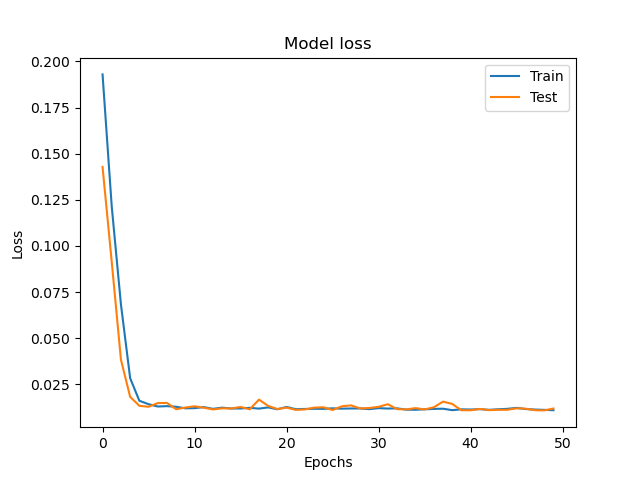

In [25]:
plt.figure() 
## Plot training & validation loss values
plt.plot( history.history['loss'])
plt.plot( history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [26]:
# Evaluate the model
score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score)

16/16 [==============================] - 0s 3ms/step - loss: 0.0119 - mse: 0.0119

Test loss: [0.011866156943142414, 0.011866156943142414]


Infine si è concluso predicendo col modello altri valori di $f(x)$ e confrontati con la funzione target.

<IPython.core.display.Javascript object>


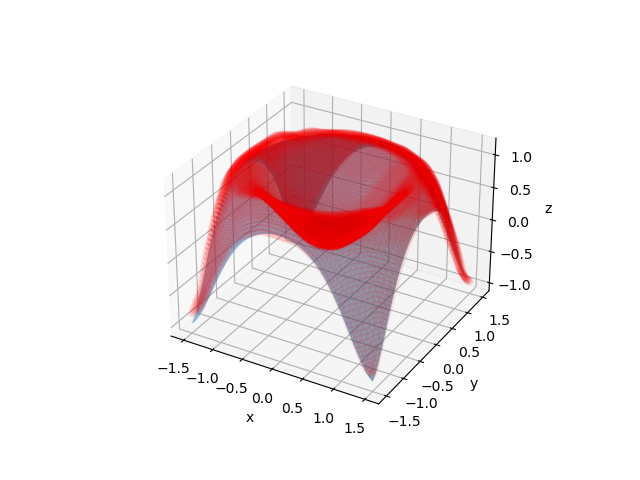

313/313 [==============================] - 1s 2ms/step


In [27]:

#####
# Crea una figura e un assi tridimensionali
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crea i valori di x e y nell'intervallo desiderato
x = np.linspace(-3./2, 3./2, 100)
y = np.linspace(-3./2, 3./2, 100)

# Crea una griglia di coordinate (x, y)
X, Y = np.meshgrid(x, y)

# Calcola i valori di z (funzione f(x, y))
Z = np.sin(X**2 + Y**2)

# Disegna la superficie continua
ax.plot_surface(X, Y, Z, alpha=0.5, label='target')

# Predict the function values using the trained model
z_pred = model.predict(np.column_stack((X.flatten(), Y.flatten())))
z_pred = z_pred.reshape(X.shape)

# Disegna i punti predetti dalla rete neurale come scatterplot
ax.scatter(X, Y, z_pred, c='red', marker='o', alpha=0.05, label='predicted')

# Imposta etichette degli assi e titolo del grafico
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Mostra il grafico
plt.show()